In [10]:
import kornia_rs
import tensorflow as tf
import cv2
import PIL


tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

print("kornia_rs: " + kornia_rs.__version__)
print("tensorflow: " + tf.__version__)
print("OpenCV: " + cv2.__version__)
print("PIL: " + PIL.__version__)


kornia_rs: 0.1.9-rc.3
tensorflow: 2.19.0
OpenCV: 4.11.0
PIL: 11.2.1


In [11]:
N = 500

kornia_rs_setup_720p = """
import io
import kornia_rs

with open("data/720p.jpeg", "rb") as f:
    image_720p = io.BytesIO(f.read())
    kornia_rs_image_720p = kornia_rs.decode_image_jpeg(image_720p.getvalue(), "rgb")
"""

kornia_rs_setup_1080p = """
import io
import kornia_rs

with open("data/1080p.jpeg", "rb") as f:
    image_1080p = io.BytesIO(f.read())
    kornia_rs_image_1080p = kornia_rs.decode_image_jpeg(image_1080p.getvalue(), "rgb")
"""

kornia_rs_setup_2k = """
import io
import kornia_rs

with open("data/2k.jpeg", "rb") as f:
    image_2k = io.BytesIO(f.read())
    kornia_rs_image_2k = kornia_rs.decode_image_jpeg(image_2k.getvalue(), "rgb")
"""

kornia_rs_setup_4k = """
import io
import kornia_rs

with open("data/4k.jpeg", "rb") as f:
    image_4k = io.BytesIO(f.read())
    kornia_rs_image_4k = kornia_rs.decode_image_jpeg(image_4k.getvalue(), "rgb")
"""

pil_setup_720p = """
import io
from PIL import Image

with open("data/720p.jpeg", "rb") as f:
    image_720p = io.BytesIO(f.read())
    pil_image_720p = Image.open(image_720p)
"""

pil_setup_1080p = """
import io
from PIL import Image

with open("data/1080p.jpeg", "rb") as f:
    image_1080p = io.BytesIO(f.read())
    pil_image_1080p = Image.open(image_1080p)
"""

pil_setup_2k = """
import io
from PIL import Image

with open("data/2k.jpeg", "rb") as f:
    image_2k = io.BytesIO(f.read())
    pil_image_2k = Image.open(image_2k)
"""

pil_setup_4k = """
import io
from PIL import Image

with open("data/4k.jpeg", "rb") as f:
    image_4k = io.BytesIO(f.read())
    pil_image_4k = Image.open(image_4k)
"""

tf_setup_720p = """
import io
import tensorflow as tf

tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

with open("data/720p.jpeg", "rb") as f:
    image_720p = io.BytesIO(f.read())
    tf_image_720p = tf.io.decode_jpeg(image_720p.getvalue(), channels=3)
"""

tf_setup_1080p = """
import io
import tensorflow as tf

tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

with open("data/1080p.jpeg", "rb") as f:
    image_1080p = io.BytesIO(f.read())
    tf_image_1080p = tf.io.decode_jpeg(image_1080p.getvalue(), channels=3)
"""

tf_setup_2k = """
import io
import tensorflow as tf

tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

with open("data/2k.jpeg", "rb") as f:
    image_2k = io.BytesIO(f.read())
    tf_image_2k = tf.io.decode_jpeg(image_2k.getvalue(), channels=3)
"""

tf_setup_4k = """
import io
import tensorflow as tf

tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

with open("data/4k.jpeg", "rb") as f:
    image_4k = io.BytesIO(f.read())
    tf_image_4k = tf.io.decode_jpeg(image_4k.getvalue(), channels=3)
"""

cv2_setup_720p = """
import io
import cv2
import numpy as np

cv2.setNumThreads(1)

with open("data/720p.jpeg", "rb") as f:
    image_720p = io.BytesIO(f.read())
    cv2_image_720p = cv2.imdecode(np.frombuffer(image_720p.getvalue(), np.uint8), cv2.IMREAD_COLOR)
"""

cv2_setup_1080p = """
import io
import cv2
import numpy as np

cv2.setNumThreads(1)

with open("data/1080p.jpeg", "rb") as f:
    image_1080p = io.BytesIO(f.read())
    cv2_image_1080p = cv2.imdecode(np.frombuffer(image_1080p.getvalue(), np.uint8), cv2.IMREAD_COLOR)
"""

cv2_setup_2k = """
import io
import cv2
import numpy as np

cv2.setNumThreads(1)

with open("data/2k.jpeg", "rb") as f:
    image_2k = io.BytesIO(f.read())
    cv2_image_2k = cv2.imdecode(np.frombuffer(image_2k.getvalue(), np.uint8), cv2.IMREAD_COLOR)
"""

cv2_setup_4k = """
import io
import cv2
import numpy as np

cv2.setNumThreads(1)

with open("data/4k.jpeg", "rb") as f:
    image_4k = io.BytesIO(f.read())
    cv2_image_4k = cv2.imdecode(np.frombuffer(image_4k.getvalue(), np.uint8), cv2.IMREAD_COLOR)
"""

In [12]:
from timeit import timeit

# ====================
# Kornia_rs
# ====================

resize_with_kornia_rs_720p_nearest = """kornia_rs.resize(kornia_rs_image_720p, (480, 854), "nearest")"""

resize_with_kornia_rs_720p_bilinear = """kornia_rs.resize(kornia_rs_image_720p, (480, 854), "bilinear")"""

resize_with_kornia_rs_1080p_nearest = """kornia_rs.resize(kornia_rs_image_1080p, (720, 1280), "nearest")"""

resize_with_kornia_rs_1080p_bilinear = """kornia_rs.resize(kornia_rs_image_1080p, (720, 1280), "bilinear")"""

resize_with_kornia_rs_2k_nearest = """kornia_rs.resize(kornia_rs_image_2k, (1080, 1920), "nearest")"""

resize_with_kornia_rs_2k_bilinear = """kornia_rs.resize(kornia_rs_image_2k, (1080, 1920), "bilinear")"""

resize_with_kornia_rs_4k_nearest = """kornia_rs.resize(kornia_rs_image_4k, (1440, 2560), "nearest")"""

resize_with_kornia_rs_4k_bilinear = """kornia_rs.resize(kornia_rs_image_4k, (1440, 2560), "bilinear")"""

kornia_rs_720p_nearest = timeit(setup=kornia_rs_setup_720p, stmt=resize_with_kornia_rs_720p_nearest, number=N) / N * 1e3
kornia_rs_720p_bilinear = timeit(setup=kornia_rs_setup_720p, stmt=resize_with_kornia_rs_720p_bilinear, number=N) / N * 1e3
kornia_rs_1080p_nearest = timeit(setup=kornia_rs_setup_1080p, stmt=resize_with_kornia_rs_1080p_nearest, number=N) / N * 1e3
kornia_rs_1080p_bilinear = timeit(setup=kornia_rs_setup_1080p, stmt=resize_with_kornia_rs_1080p_bilinear, number=N) / N * 1e3
kornia_rs_2k_nearest = timeit(setup=kornia_rs_setup_2k, stmt=resize_with_kornia_rs_2k_nearest, number=N) / N * 1e3
kornia_rs_2k_bilinear = timeit(setup=kornia_rs_setup_2k, stmt=resize_with_kornia_rs_2k_bilinear, number=N) / N * 1e3
kornia_rs_4k_nearest = timeit(setup=kornia_rs_setup_4k, stmt=resize_with_kornia_rs_4k_nearest, number=N) / N * 1e3
kornia_rs_4k_bilinear = timeit(setup=kornia_rs_setup_4k, stmt=resize_with_kornia_rs_4k_bilinear, number=N) / N * 1e3

print(f"Kornia_rs 720p Nearest: {kornia_rs_720p_nearest:.2f} ms")
print(f"Kornia_rs 720p Bilinear: {kornia_rs_720p_bilinear:.2f} ms")
print(f"Kornia_rs 1080p Nearest: {kornia_rs_1080p_nearest:.2f} ms")
print(f"Kornia_rs 1080p Bilinear: {kornia_rs_1080p_bilinear:.2f} ms")
print(f"Kornia_rs 2k Nearest: {kornia_rs_2k_nearest:.2f} ms")
print(f"Kornia_rs 2k Bilinear: {kornia_rs_2k_bilinear:.2f} ms")
print(f"Kornia_rs 4k Nearest: {kornia_rs_4k_nearest:.2f} ms")
print(f"Kornia_rs 4k Bilinear: {kornia_rs_4k_bilinear:.2f} ms")

Kornia_rs 720p Nearest: 0.34 ms
Kornia_rs 720p Bilinear: 1.30 ms
Kornia_rs 1080p Nearest: 0.75 ms
Kornia_rs 1080p Bilinear: 2.86 ms
Kornia_rs 2k Nearest: 2.17 ms
Kornia_rs 2k Bilinear: 5.93 ms
Kornia_rs 4k Nearest: 5.11 ms
Kornia_rs 4k Bilinear: 13.73 ms


In [13]:
# ====================
# PIL
# ====================
resize_with_pil_720p_nearest = """pil_image_720p.resize((854, 480), Image.NEAREST)"""

resize_with_pil_720p_bilinear = """pil_image_720p.resize((854, 480), Image.BILINEAR)"""

resize_with_pil_1080p_nearest = """pil_image_1080p.resize((1280, 720), Image.NEAREST)"""

resize_with_pil_1080p_bilinear = """pil_image_1080p.resize((1280, 720), Image.BILINEAR)"""

resize_with_pil_2k_nearest = """pil_image_2k.resize((1920, 1080), Image.NEAREST)"""

resize_with_pil_2k_bilinear = """pil_image_2k.resize((1920, 1080), Image.BILINEAR)"""

resize_with_pil_4k_nearest = """pil_image_4k.resize((2560, 1440), Image.NEAREST)"""

resize_with_pil_4k_bilinear = """pil_image_4k.resize((2560, 1440), Image.BILINEAR)"""

pil_720p_nearest = timeit(setup=pil_setup_720p, stmt=resize_with_pil_720p_nearest, number=N) / N * 1e3
pil_720p_bilinear = timeit(setup=pil_setup_720p, stmt=resize_with_pil_720p_bilinear, number=N) / N * 1e3
pil_1080p_nearest = timeit(setup=pil_setup_1080p, stmt=resize_with_pil_1080p_nearest, number=N) / N * 1e3
pil_1080p_bilinear = timeit(setup=pil_setup_1080p, stmt=resize_with_pil_1080p_bilinear, number=N) / N * 1e3
pil_2k_nearest = timeit(setup=pil_setup_2k, stmt=resize_with_pil_2k_nearest, number=N) / N * 1e3
pil_2k_bilinear = timeit(setup=pil_setup_2k, stmt=resize_with_pil_2k_bilinear, number=N) / N * 1e3
pil_4k_nearest = timeit(setup=pil_setup_4k, stmt=resize_with_pil_4k_nearest, number=N) / N * 1e3
pil_4k_bilinear = timeit(setup=pil_setup_4k, stmt=resize_with_pil_4k_bilinear, number=N) / N * 1e3

print(f"PIL 720p Nearest: {pil_720p_nearest:.2f} ms")
print(f"PIL 720p Bilinear: {pil_720p_bilinear:.2f} ms")
print(f"PIL 1080p Nearest: {pil_1080p_nearest:.2f} ms")
print(f"PIL 1080p Bilinear: {pil_1080p_bilinear:.2f} ms")
print(f"PIL 2k Nearest: {pil_2k_nearest:.2f} ms")
print(f"PIL 2k Bilinear: {pil_2k_bilinear:.2f} ms")
print(f"PIL 4k Nearest: {pil_4k_nearest:.2f} ms")
print(f"PIL 4k Bilinear: {pil_4k_bilinear:.2f} ms")


PIL 720p Nearest: 0.18 ms
PIL 720p Bilinear: 4.99 ms
PIL 1080p Nearest: 0.39 ms
PIL 1080p Bilinear: 11.22 ms
PIL 2k Nearest: 0.93 ms
PIL 2k Bilinear: 21.59 ms
PIL 4k Nearest: 2.16 ms
PIL 4k Bilinear: 44.72 ms


In [14]:
# ====================
# Tensorflow
# ====================
resize_with_tf_720p_nearest = """tf.image.resize(tf_image_720p, (480, 854), method='nearest')"""

resize_with_tf_720p_bilinear = """tf.image.resize(tf_image_720p, (480, 854), method='bilinear')"""

resize_with_tf_1080p_nearest = """tf.image.resize(tf_image_1080p, (720, 1280), method='nearest')"""

resize_with_tf_1080p_bilinear = """tf.image.resize(tf_image_1080p, (720, 1280), method='bilinear')"""

resize_with_tf_2k_nearest = """tf.image.resize(tf_image_2k, (1080, 1920), method='nearest')"""

resize_with_tf_2k_bilinear = """tf.image.resize(tf_image_2k, (1080, 1920), method='bilinear')"""

resize_with_tf_4k_nearest = """tf.image.resize(tf_image_4k, (1440, 2560), method='nearest')"""

resize_with_tf_4k_bilinear = """tf.image.resize(tf_image_4k, (1440, 2560), method='bilinear')"""

tf_720p_nearest = timeit(setup=tf_setup_720p, stmt = resize_with_tf_720p_nearest, number=N) / N * 1e3
tf_720p_bilinear = timeit(setup=tf_setup_720p, stmt = resize_with_tf_720p_bilinear, number=N) / N * 1e3
tf_1080p_nearest = timeit(setup=tf_setup_1080p, stmt = resize_with_tf_1080p_nearest, number=N) / N * 1e3
tf_1080p_bilinear = timeit(setup=tf_setup_1080p, stmt = resize_with_tf_1080p_bilinear, number=N) / N * 1e3
tf_2k_nearest = timeit(setup=tf_setup_2k, stmt = resize_with_tf_2k_nearest, number=N) / N * 1e3
tf_2k_bilinear = timeit(setup=tf_setup_2k, stmt = resize_with_tf_2k_bilinear, number=N) / N * 1e3
tf_4k_nearest = timeit(setup=tf_setup_4k, stmt = resize_with_tf_4k_nearest, number=N) / N * 1e3
tf_4k_bilinear = timeit(setup=tf_setup_4k, stmt = resize_with_tf_4k_bilinear, number=N) / N * 1e3

print(f"Tensorflow 720p Nearest: {tf_720p_nearest:.2f} ms")
print(f"Tensorflow 720p Bilinear: {tf_720p_bilinear:.2f} ms")
print(f"Tensorflow 1080p Nearest: {tf_1080p_nearest:.2f} ms")
print(f"Tensorflow 1080p Bilinear: {tf_1080p_bilinear:.2f} ms")
print(f"Tensorflow 2k Nearest: {tf_2k_nearest:.2f} ms")
print(f"Tensorflow 2k Bilinear: {tf_2k_bilinear:.2f} ms")
print(f"Tensorflow 4k Nearest: {tf_4k_nearest:.2f} ms")
print(f"Tensorflow 4k Bilinear: {tf_4k_bilinear:.2f} ms")

Tensorflow 720p Nearest: 2.64 ms
Tensorflow 720p Bilinear: 1.80 ms
Tensorflow 1080p Nearest: 5.69 ms
Tensorflow 1080p Bilinear: 3.91 ms
Tensorflow 2k Nearest: 12.79 ms
Tensorflow 2k Bilinear: 8.68 ms
Tensorflow 4k Nearest: 22.85 ms
Tensorflow 4k Bilinear: 31.92 ms


In [15]:
# ====================
# OpenCV
# ====================
resize_with_cv2_720p_nearest = """cv2.resize(cv2_image_720p, (854, 480), interpolation=cv2.INTER_NEAREST)"""

resize_with_cv2_720p_bilinear = """cv2.resize(cv2_image_720p, (854, 480), interpolation=cv2.INTER_LINEAR)"""

resize_with_cv2_1080p_nearest = """cv2.resize(cv2_image_1080p, (1280, 720), interpolation=cv2.INTER_NEAREST)"""

resize_with_cv2_1080p_bilinear = """cv2.resize(cv2_image_1080p, (1280, 720), interpolation=cv2.INTER_LINEAR)"""

resize_with_cv2_2k_nearest = """cv2.resize(cv2_image_2k, (1920, 1080), interpolation=cv2.INTER_NEAREST)"""

resize_with_cv2_2k_bilinear = """cv2.resize(cv2_image_2k, (1920, 1080), interpolation=cv2.INTER_LINEAR)"""

resize_with_cv2_4k_nearest = """cv2.resize(cv2_image_4k, (2560, 1440), interpolation=cv2.INTER_NEAREST)"""

resize_with_cv2_4k_bilinear = """cv2.resize(cv2_image_4k, (2560, 1440), interpolation=cv2.INTER_LINEAR)"""

cv2_720p_nearest = timeit(setup=cv2_setup_720p, stmt = resize_with_cv2_720p_nearest, number=N) / N * 1e3
cv2_720p_bilinear = timeit(setup=cv2_setup_720p, stmt = resize_with_cv2_720p_bilinear, number=N) / N * 1e3
cv2_1080p_nearest = timeit(setup=cv2_setup_1080p, stmt = resize_with_cv2_1080p_nearest, number=N) / N * 1e3
cv2_1080p_bilinear = timeit(setup=cv2_setup_1080p, stmt = resize_with_cv2_1080p_bilinear, number=N) / N * 1e3
cv2_2k_nearest = timeit(setup=cv2_setup_2k, stmt = resize_with_cv2_2k_nearest, number=N) / N * 1e3
cv2_2k_bilinear = timeit(setup=cv2_setup_2k, stmt = resize_with_cv2_2k_bilinear, number=N) / N * 1e3
cv2_4k_nearest = timeit(setup=cv2_setup_4k, stmt = resize_with_cv2_4k_nearest, number=N) / N * 1e3
cv2_4k_bilinear = timeit(setup=cv2_setup_4k, stmt = resize_with_cv2_4k_bilinear, number=N) / N * 1e3

print(f"OpenCV 720p Nearest: {cv2_720p_nearest:.2f} ms")
print(f"OpenCV 720p Bilinear: {cv2_720p_bilinear:.2f} ms")
print(f"OpenCV 1080p Nearest: {cv2_1080p_nearest:.2f} ms")
print(f"OpenCV 1080p Bilinear: {cv2_1080p_bilinear:.2f} ms")
print(f"OpenCV 2k Nearest: {cv2_2k_nearest:.2f} ms")
print(f"OpenCV 2k Bilinear: {cv2_2k_bilinear:.2f} ms")
print(f"OpenCV 4k Nearest: {cv2_4k_nearest:.2f} ms")
print(f"OpenCV 4k Bilinear: {cv2_4k_bilinear:.2f} ms")

OpenCV 720p Nearest: 0.31 ms
OpenCV 720p Bilinear: 0.59 ms
OpenCV 1080p Nearest: 0.69 ms
OpenCV 1080p Bilinear: 1.33 ms
OpenCV 2k Nearest: 1.53 ms
OpenCV 2k Bilinear: 2.83 ms
OpenCV 4k Nearest: 2.82 ms
OpenCV 4k Bilinear: 5.30 ms


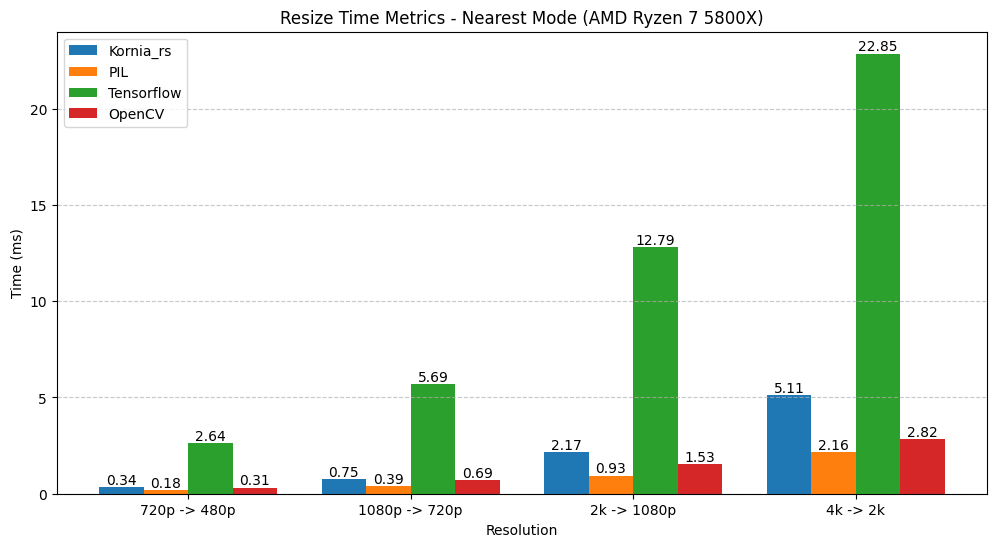

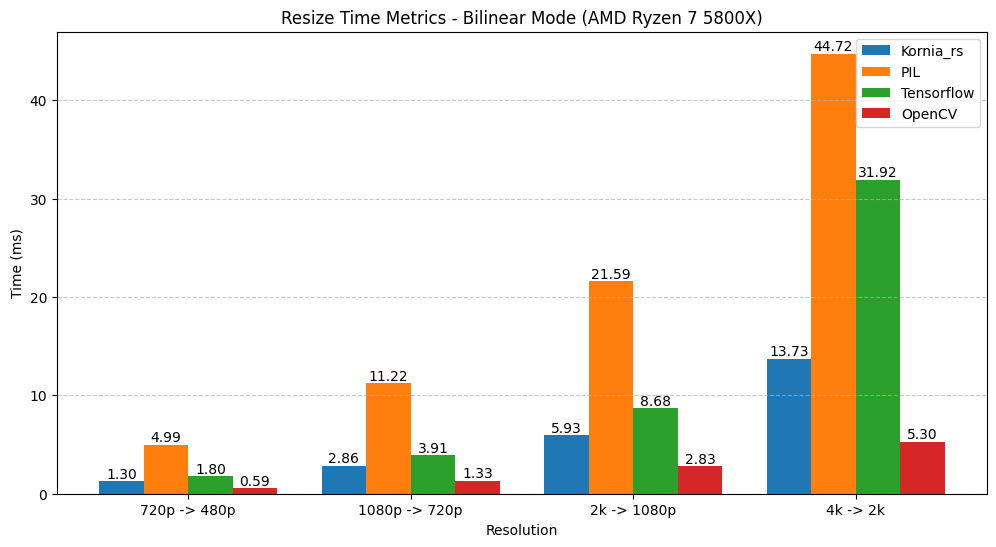

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Data for Nearest Mode
nearest_modes = {
    "Kornia_rs": [kornia_rs_720p_nearest, kornia_rs_1080p_nearest, kornia_rs_2k_nearest, kornia_rs_4k_nearest],
    "PIL": [pil_720p_nearest, pil_1080p_nearest, pil_2k_nearest, pil_4k_nearest],
    "Tensorflow": [tf_720p_nearest, tf_1080p_nearest, tf_2k_nearest, tf_4k_nearest],
    "OpenCV": [cv2_720p_nearest, cv2_1080p_nearest, cv2_2k_nearest, cv2_4k_nearest]
}

# Data for Bilinear Mode
bilinear_modes = {
    "Kornia_rs": [kornia_rs_720p_bilinear, kornia_rs_1080p_bilinear, kornia_rs_2k_bilinear, kornia_rs_4k_bilinear],
    "PIL": [pil_720p_bilinear, pil_1080p_bilinear, pil_2k_bilinear, pil_4k_bilinear],
    "Tensorflow": [tf_720p_bilinear, tf_1080p_bilinear, tf_2k_bilinear, tf_4k_bilinear],
    "OpenCV": [cv2_720p_bilinear, cv2_1080p_bilinear, cv2_2k_bilinear, cv2_4k_bilinear]
}

resolutions = ["720p -> 480p", "1080p -> 720p", "2k -> 1080p", "4k -> 2k"]
x = np.arange(len(resolutions))  # the label locations
width = 0.2  # the width of the bars

# Plot for Nearest Mode
plt.figure(figsize=(12, 6))
for i, (method, times) in enumerate(nearest_modes.items()):
    bars = plt.bar(x + i * width, times, width, label=method)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.title("Resize Time Metrics - Nearest Mode (AMD Ryzen 7 5800X)")
plt.xlabel("Resolution")
plt.ylabel("Time (ms)")
plt.xticks(x + width * 1.5, resolutions)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot for Bilinear Mode
plt.figure(figsize=(12, 6))
for i, (method, times) in enumerate(bilinear_modes.items()):
    bars = plt.bar(x + i * width, times, width, label=method)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.title("Resize Time Metrics - Bilinear Mode (AMD Ryzen 7 5800X)")
plt.xlabel("Resolution")
plt.ylabel("Time (ms)")
plt.xticks(x + width * 1.5, resolutions)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()